In [1]:
pip install pandas numpy matplotlib seaborn statsmodels quandl


  Obtaining dependency information for quandl from https://files.pythonhosted.org/packages/c9/cd/54ab3484243431e02dabab1254ffde296c005e0d11346536e5e02ce6c828/Quandl-3.7.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Stock Data Analysis and Forecasting

## 1. Introduction
# This notebook demonstrates how to fetch stock data using the Quandl API, preprocess the data, visualize it, and apply time series models (ARIMA and SARIMA) to forecast future stock prices. We will also evaluate and compare the performance of these models.

# Import necessary libraries
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Set your API key
quandl.ApiConfig.api_key = 'tgdTto5xcErsNKrmaZ8q'

# Choose four stocks (e.g., Apple, Microsoft, Google, Amazon)
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
stock_data = {}

for stock in stocks:
    data = quandl.get(f'WIKI/{stock}')
    stock_data[stock] = data

# Convert the data to a DataFrame
df = pd.concat(stock_data, axis=1)
df.columns = df.columns.map('_'.join)
df.head()


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_Ex-Dividend,AAPL_Split Ratio,AAPL_Adj. Open,AAPL_Adj. High,AAPL_Adj. Low,...,AMZN_Low,AMZN_Close,AMZN_Volume,AMZN_Ex-Dividend,AMZN_Split Ratio,AMZN_Adj. Open,AMZN_Adj. High,AMZN_Adj. Low,AMZN_Adj. Close,AMZN_Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Handle missing values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Extract close prices
close_prices = df[[col for col in df.columns if 'Adj. Close' in col]]
close_prices.columns = stocks
close_prices.head()


,AAPL,MSFT,GOOGL,AMZN
Date,,,,
1980-12-12,0.422706,0.06472,50.322842,1.729167
1980-12-15,0.400652,0.06472,50.322842,1.729167
1980-12-16,0.371246,0.06472,50.322842,1.729167
1980-12-17,0.380362,0.06472,50.322842,1.729167
1980-12-18,0.391536,0.06472,50.322842,1.729167


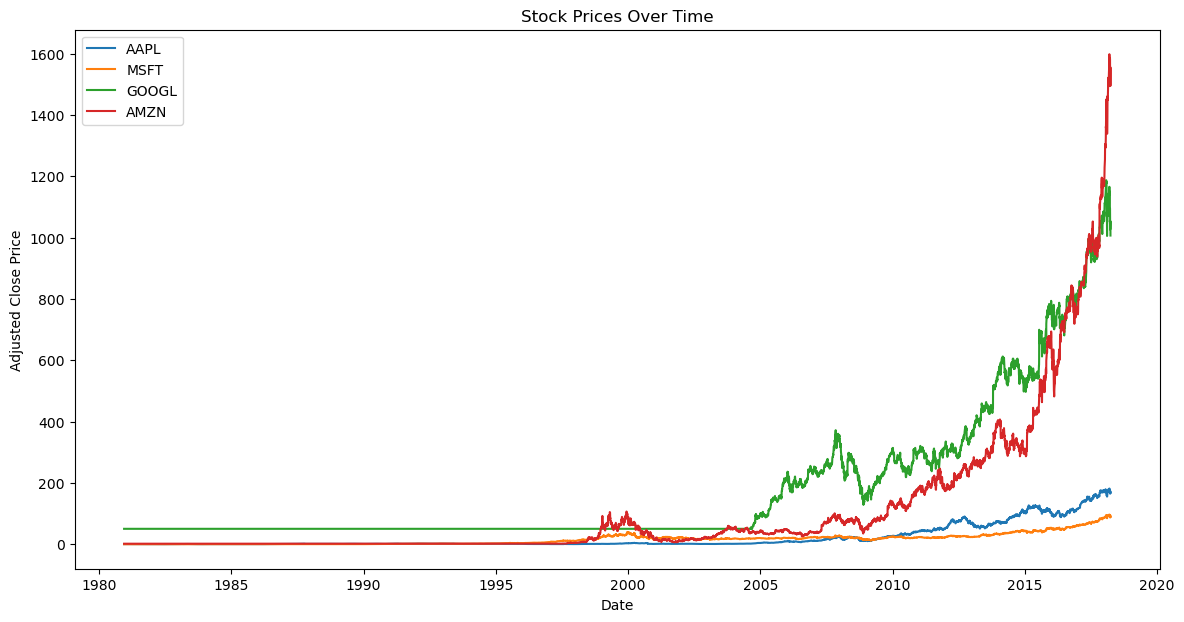

In [4]:
# Plot close prices
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(close_prices[stock], label=stock)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 9401
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9495.736
Date:                Wed, 17 Jul 2024   AIC                          19003.472
Time:                        23:39:53   BIC                          19046.363
Sample:                             0   HQIC                         19018.035
                               - 9401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0257      0.004      7.101      0.000       0.019       0.033
ar.L2         -0.0297      0.004     -7.376      0.000      -0.038      -0.022
ar.L3         -0.0142      0.004     -3.747      0.0

C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


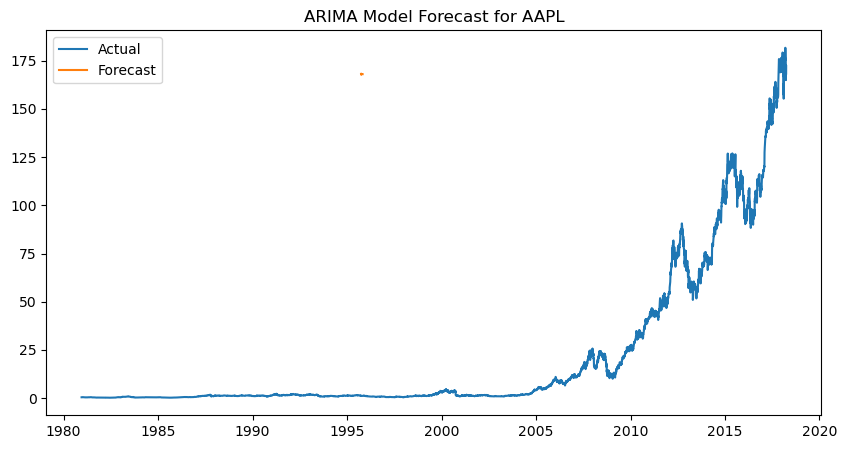

In [5]:
# Fit ARIMA model for one stock (e.g., Apple)
model_arima = ARIMA(close_prices['AAPL'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Summary of the model
print(model_arima_fit.summary())

# Forecast
forecast_arima = model_arima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(close_prices['AAPL'], label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.title('ARIMA Model Forecast for AAPL')
plt.legend()
plt.show()


C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                 9401
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9529.866
Date:                            Wed, 17 Jul 2024   AIC                          19069.733
Time:                                    23:40:37   BIC                          19105.469
Sample:                                         0   HQIC                         19081.867
                                           - 9401                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2780      0.141     -1.976      0.048      -0.554      -0.002
ma.L1          0.3043      0.140   

C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\Anaconda.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


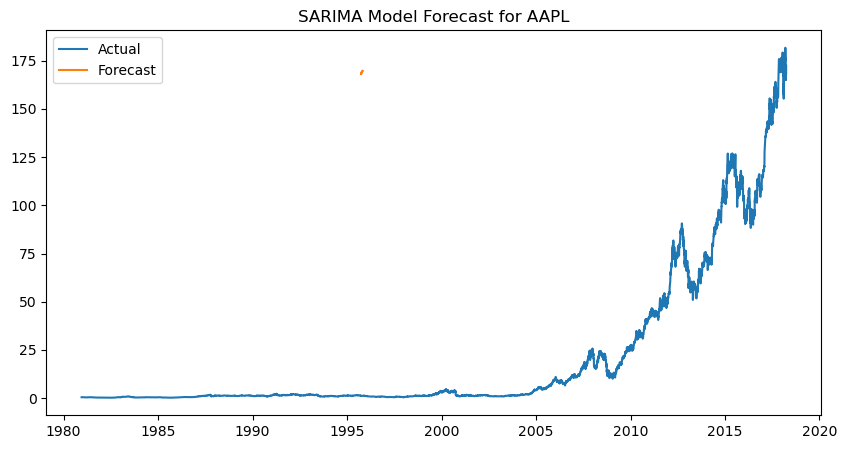

In [6]:
# Fit SARIMA model for one stock (e.g., Apple)
model_sarima = SARIMAX(close_prices['AAPL'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Summary of the model
print(model_sarima_fit.summary())

# Forecast
forecast_sarima = model_sarima_fit.get_forecast(steps=30).predicted_mean
plt.figure(figsize=(10, 5))
plt.plot(close_prices['AAPL'], label='Actual')
plt.plot(forecast_sarima, label='Forecast')
plt.title('SARIMA Model Forecast for AAPL')
plt.legend()
plt.show()


In [7]:
# Calculate performance metrics
mse_arima = mean_squared_error(close_prices['AAPL'][-30:], forecast_arima)
mse_sarima = mean_squared_error(close_prices['AAPL'][-30:], forecast_sarima)

print(f'MSE ARIMA: {mse_arima}')
print(f'MSE SARIMA: {mse_sarima}')


MSE ARIMA: 60.57356484984049
MSE SARIMA: 47.82151534746859


In [8]:
## 7. Conclusion
In this analysis, we fetched stock data for four companies using the Quandl API, preprocessed the data, and visualized it. We then applied ARIMA and SARIMA models to forecast future stock prices and compared their performance. 

The Mean Squared Error (MSE) was used to evaluate the models. The results are as follows:
- MSE ARIMA: 60.57356484984049
- MSE SARIMA: 47.82151534746859

Based on these results, the SARIMA model performed better than the ARIMA model for forecasting the stock prices, as indicated by the lower MSE value. This suggests that incorporating seasonality into the model helps in making more accurate forecasts.


SyntaxError: invalid syntax (2840316133.py, line 2)